# **<div align="center"> Analysing popular repositories on GitHub  </div>**

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/Potential17/Potential17/master/github-logo-octocat-.gif" width="200" height="150">
</div>

## <u>Introduction:</u>

<font size="4"> GitHub is one of the most popular version control and source code management platform. It is also one of the largest social networking site for programmers. Software developers use it to showcase their skills to recruiters and hiring managers. By analysing the repositories on GitHub, we can get valuable insights like user behavior, what makes a repository popular or what technologies are trending among developers nowadays and much more. </font>

## <u>Objectives:</u>
<font size='4'>
    <ol>
        <li>Read, clean and structure data to make it suitable for analysis</li>
        <li>Analyse top repositories based on popularity</li>
        <li>Analyse users with more repositories</li>
        <li>Understand contribution activities across the repositories</li>
        <li>Explore most popular tags</li>
        </ol>
    </font>

### Let's *git* this started

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# read input data
github_data_df = pd.read_csv('../input/github-repositories-analysis/Github_data.csv')

In [ ]:
# a quick peek into the data
github_data_df.head()

#### Let's drop the columns *Unnamed: 0* and *Unnamed: 0.1* as they are just sub-indexes and are trivial

In [ ]:
github_data_df = github_data_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [ ]:
# get basic information about the dataset
github_data_df.info()

In [ ]:
# picking columns that are more relevant
github_df = github_data_df[['topic','name','user','star','fork','watch','issue','pull_requests','topic_tag','commits','contributers']]

In [ ]:
# Rename the columns for more clarity
new_names = ['Topic','Repo_Name','User_Name','Star','Fork','Watch','Issues','Pull_Requests',
             'Topic_Tags','Commits','Contributors']
old_names = github_df.columns
github_df = github_df.rename(columns=dict(zip(old_names, new_names)))

In [ ]:
# make sure columns are renamed accordingly
github_df.head(2)

In [ ]:
# Let's convert Star, Fork and Watch columns to numeric by replacing 'k' with 1000
github_df['Star'] = github_df['Star'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Fork'] = github_df['Fork'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Watch'] = github_df['Watch'].apply(lambda x: float(x.rstrip('k'))*1000 if 'k' in x else float(x))

In [ ]:
# Remove , from issue and commits
github_df['Issues'] = github_df['Issues'].apply(lambda x: x.replace(',',''))
github_df['Commits'] = github_df['Commits'].apply(lambda x: x.replace(',',''))

In [ ]:
# Convert multiple object columns to int
cols = ['Issues','Pull_Requests','Commits','Contributors']

github_df[cols] = github_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
# look at the types of the columns
github_df.dtypes

In [ ]:
# display basic statistical details about the columns
github_df.describe()

# ***1. Analysis of top repositories based on popularity***

<font size='4'> <i>What makes a GitHub repo popular?</i> This question can be answered with 3 Metrics - Star, Watch and Fork. 
    <ul>
        <li>Star - When a user likes your repo or they want to show some appreciation, they Star it.</li>
        <li>Watch - When a user wants to be notified of all the activities in a repo, then they Watch it.</li>
        <li>Fork - When a user wants a copy of the repo or make any contributions, they tend to Fork it.</li>
    </ul>
</font>

In [ ]:
# create a dataframe with average values of the columns across all topics
pop_mean_df = github_df.groupby('Topic').mean().reset_index()

In [ ]:
pop_mean_df

## 1.1 Analysis of Stars

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,45000)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Star', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Stars', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average stars on each topic',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most starred repos
github_df.nlargest(n=10, columns='Star')[['Repo_Name','Topic','Star']]

In [ ]:
# Quick Tip: '\033[1m' prints a string in bold and '\033[0m' prints it back normally.
print('Most starred repository is {}{}{} in the topic {}{}{} with {}{}{} stars'.
      format('\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Topic'],'\033[0m',
            '\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Star'],'\033[0m'))

<i><font size='4' color='green'> <b>In the top 10 most starred repositories, 4 are frameworks (vue, react, tensorflow, bootstrap) and 6 of them are about JavaScript.</b> </font></i>

## 1.2 Analysis of Watch

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,1600)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Watch', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Watchers', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average watchers on each topic',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most watched repos
github_df.nlargest(n=10, columns='Watch')[['Repo_Name','Topic','Watch']]

In [ ]:
print('Most watched repository is {}{}{} in the topic {}{}'.
      format('\033[1m',github_df.iloc[github_df['Watch'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Watch'].idxmax()]['Topic']))

<i><font size='4' color='green'> <b>In the top 10 most watched repositories, 4 are frameworks (tensorflow, bootstrap, react, vue), 6 are about JavaScript and 5 of them contain learning content for programmers.</b> </font></i>

## 1.3 Analysis of Fork

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,8000)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Fork', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Forks', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average forks on each topic',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most forked repos
github_df.nlargest(n=10, columns='Fork')[['Repo_Name','Topic','Fork']]

In [ ]:
print('Most forked repository is {}{}{} in the topic {}{}'.
      format('\033[1m',github_df.iloc[github_df['Fork'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Fork'].idxmax()]['Topic']))

<i><font size='4' color='green'> <b>In the top 10 most forked repositories, 4 are frameworks (tensorflow, bootstrap, spring-boot, react) and 5 of them contain learning content for programmers.</b> </font></i>

## 1.4 Relationship between Star, Fork and Watch

#### Often times users fork a repo when they want to contribute to it. So, let's explore the relationship between star-fork and watch-fork.

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# set seaborn theme for background grids
sns.set_theme('paper')

# plot the data
sns.regplot(data=github_df, x='Star', y='Fork', color='purple');

# set x and y-axis labels and title
ax.set_xlabel('Star', fontsize=13, color = '#333F4B')
ax.set_ylabel('Fork', fontsize=13, color = '#333F4B')
fig.suptitle('Relationship between Star and Fork',fontsize=18, color = '#333F4B');

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# set seaborn theme for background grids
sns.set_theme('paper')

# plot the data
sns.regplot(data=github_df, x='Watch', y='Fork', color='purple');

# set x and y-axis labels and title
ax.set_xlabel('Watch', fontsize=13, color = '#333F4B')
ax.set_ylabel('Fork', fontsize=13, color = '#333F4B')
fig.suptitle('Relationship between Watch and Fork',fontsize=18, color = '#333F4B');

#### The data points are much more closer to the regression line between Watch and Fork compared to Star and Fork.

<i><font size='4' color='green'> <b>From this we can conclude, if a user is watching a repo then they are mostly likely to fork it.</b></font></i>

# ***2. Analysis of users with more repositories***

In [ ]:
# create a list of top 10 users with more repositories
users_with_more_repos = github_df.groupby('User_Name').size().nlargest(n=10).reset_index(name='Count')['User_Name'].to_list()

In [ ]:
users_with_more_repos

In [ ]:
# create a dataframe using users_with_more_repos list
more_repos_users = github_df[github_df['User_Name'].isin(users_with_more_repos)][['Topic','User_Name','Star']]

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# add colors to xticks, yticks and change labelsize
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['ytick.labelsize']=12

# remove border
sns.despine(left=True, bottom=True)

ax.grid(False)
ax.set_facecolor('white')
ax.set_xlim(0,18)

# plot data
sns.countplot(data=more_repos_users,y='User_Name',palette = 'cool',
             order=more_repos_users['User_Name'].value_counts().index);

# set x and y-axis labels and title
ax.set_xlabel('Count', fontsize=12, color = '#333F4B')
ax.set_ylabel('User Name', fontsize=12, color = '#333F4B')
fig.suptitle('Top 10 users with more repositories',fontsize=18, color = '#333F4B');

<i><font size='4' color='green'> <b>In the top 10 users with more repositories,
    <ul>
        <li> Microsoft tops the list with 17 repos </li>
        <li> Google follows with 15 repos </li>
        <li> 6 of them are companies or owned by a company (microsoft, google, adafruit, alibaba, PacktPublishing, flutter) </li>
        <li> 3 are individual users (junyanz, rasbt, MicrocontrollersAndMore) </li>
    </ul></b>
</font></i>

# ***3.Understanding contribution activities across the repositories***

### <u>GitHub is famous for its contribution graph.</u>
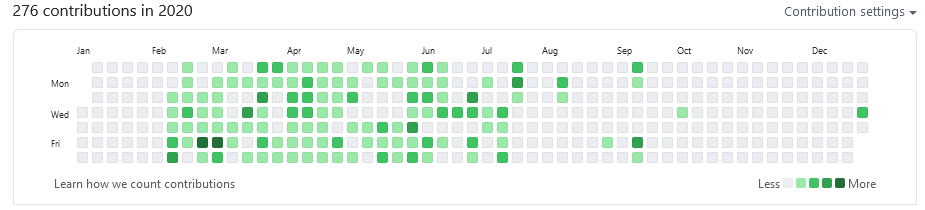

<font size='4'>This graph is a record of all the contributions that a user has made. Whenever a user makes a commit, opens an isssue or proposes a pull request, it is considered a contribution. There are four columns related to contributions in our dataset, *Issues, Pull_Requests, Commits, Contributors.* Let's see if there is any real relationship between them.</font>

In [ ]:
# drop rows with any null values and create a dataframe with only the contribution columns
corr_df = github_df.dropna(axis=0, subset = ['Issues','Pull_Requests','Commits','Contributors'])[['Issues','Pull_Requests','Commits','Contributors']]

In [ ]:
# correlation between the contribution columns
corr_df.corr()

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(corr_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlation between the contribution columns',fontsize=16, color = '#333F4B');

<font size='4'> Number of Commits is not dependent on either issue, pull requests or contributors. There is a Moderate Positive Relationship between Issues and Pull Requests.</font>

#### Let's explore the top 100 popular repositories and see if it's the same,

In [ ]:
popular_df = github_df.nlargest(n=100,columns=['Star'])[['Issues','Pull_Requests','Commits','Contributors']]

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(popular_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlation of contributions in Top 100 popular repositories',fontsize=16, color = '#333F4B');

#### It's nearly the same in top 100 popular repositories as in the overall dataset.

#### Let's check for users with more repositories,

In [ ]:
# create a dataframe using users_with_more_repos list
more_repos_users_df = github_df[github_df['User_Name'].isin(users_with_more_repos)][['Issues','Pull_Requests','Commits','Contributors']]

# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(more_repos_users_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlation of contributions among users with more repositories',fontsize=16, color = '#333F4B');

<font size='4'> Surprisingly, users with more repos tend to be more active. There is a fairly strong positive correlation between
    <ol>
    <li>Commits and Pull requests</li>
    <li>Commits and Issues</li>
    <li>Issues and Pull requests</li>
    </ol>
</font>

<i><font size='4' color='green'> <b>As far as contributions are concerned,
    <ul>
        <li> There is no real relationship between contribution activities in the overall dataset. </li>
        <li> There is no correlation among contributions in the Top 100 popular repos either.</li>
        <li> If the users tend to have more repos, then the chances of contributions are fairly higher.</li>
    </ul></b>
</font></i>

# ***4. Analysis of Topic Tags***

### Adding tags to a repository are a way of classifying them with topics. It helps other users find and contribute to that repo.

In [ ]:
# let's look at the topic_tags column
github_df['Topic_Tags'].head()

In [ ]:
import ast
from collections import Counter

# convert column to list of lists
topic_tags = github_df['Topic_Tags'].apply(lambda x: ast.literal_eval(x)).tolist()

# split all lists and select individual items
all_tags = [tag for topic in topic_tags for tag in topic]

# count the occurrence of each tag
tags_dict = Counter(all_tags)

In [ ]:
# create a dataframe with most tags
toptags_df = pd.DataFrame(tags_dict.most_common(15), columns=['Name of the Tag','Count'])

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# rotate the labels along x-axis
plt.xticks(rotation=90)

ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot the data
sns.barplot(data=toptags_df, x='Name of the Tag', y='Count', palette='autumn');

# set x and y-axis labels and title
ax.set_xlabel('Topic Tags', fontsize=13, color = '#333F4B')
ax.set_ylabel('Count', fontsize=13, color = '#333F4B')
fig.suptitle('Most popular topic tags',fontsize=18, color = '#333F4B');

<i><font size='4' color='green'> <b>Out of the top 15 most popular tags, 10 belong to the world of data science.</b>
</font></i>

In [ ]:
# len of tags list in each column
len_tags = [len(tag) for tag in topic_tags]

# create a new column -> total_tags
github_df['Total_Tags'] = len_tags

# group based on topic and calculate total_tags in each topic
topic_wise_tags = github_df.groupby('Topic').sum()['Total_Tags'].reset_index(name='Total Tags')

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# remove background grids
ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot the data
sns.barplot(data=topic_wise_tags,x='Total Tags', y='Topic', ci=None, palette='gist_rainbow');

# set x and y-axis labels and title
ax.set_xlabel('Total Tags', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Tags distribution across topics',fontsize=18, color = '#333F4B');

<i><font size='4' color='green'><b>Repositories with topics Computer Vision, Data Science and Machine Learning tend to be tagged more.</b></font></i>

In [ ]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
# create a string with all the topic tags
github_tags = (" ").join(all_tags)

# assign the mask image to a variable
git_mask = np.array(Image.open('../input/wordcloud-mask/github_icon.jpg'))

# instantiate a word cloud object
tags_wc = WordCloud(
    mask = git_mask,
    background_color='white',
    max_font_size=120,
    max_words=200,
)

# generate the word cloud
tags_wc.generate(github_tags)

plt.figure(figsize=(6,6),dpi=100)
plt.imshow(tags_wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Most common tags used in Github Repositories',fontdict={'size': 15,'color': 'orange','verticalalignment': 'center'})
plt.show()

## ***Inference:***
<font size='4'>
    <i>
    <ul>
        <li>Among the top 10 most starred, watched, and forked repositories, 4 are frameworks.</li>
        <li>Tensorflow is the most watched and forked repository.</li>
        <li>If a user is watching a repository, then they are mostly likely to fork it.</li>
        <li>Microsoft and Google tend to be users with more popular repositories.</li>
        <li>In the top 10 users with more popular repositories, 6 of them are companies.</li>
        <li>There is no actual relatonship between contribution activities (Issues, Pull requests, Commits).</li>
        <li>Most used tags are Machine Learning, Deep Learning, Python, Computer Vision, JavaScript.</li>
        <li>Repositories with topics Computer Vision, Data Science and Machine Learning have more tags.</li>
    </ul>
    </i>
</font>

#### Thank you for viewing all the way down here! Please do upvote if you like my work.
#### Let me know in the comment section if you have any concerns, feedback, or criticism. Have a good day! 